## India's Timeline in fight against the Pandemic

### Importing required Python Packages and Libraries

In [188]:
!pip install --upgrade setuptools
#!pip install pystan==2.19.1.1
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures
!pip install patsy 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
!pip install --upgrade statsmodels
!pip install prophet
from prophet import Prophet
!pip install statsmodels
import statsmodels.formula.api as smf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
covid=pd.read_csv("/content/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000


In [190]:
#Extracting India's data 
covid_india=covid[covid['Country/Region']=="India"]

#Extracting other countries for comparison of worst affected countries
covid_spain=covid[covid['Country/Region']=="Spain"]
covid_us=covid[covid['Country/Region']=="US"]
covid_italy=covid[covid['Country/Region']=="Italy"]
covid_iran=covid[covid['Country/Region']=="Iran"]
covid_france=covid[covid['Country/Region']=="France"]
covid_uk=covid[covid['Country/Region']=="UK"]
covid_br=covid[covid['Country/Region']=="Brazil"]
covid_russia=covid[covid['Country/Region']=="Russia"]

#Extracting data of neighbouring countries
covid_pak=covid[covid['Country/Region']=="Pakistan"]
covid_china=covid[covid['Country/Region']=="Mainland China"]
covid_afg=covid[covid['Country/Region']=="Afghanistan"]
covid_nepal=covid[covid['Country/Region']=="Nepal"]
covid_bhutan=covid[covid['Country/Region']=="Bhutan"]
covid_lanka=covid[covid["Country/Region"]=="Sri Lanka"]
covid_ban=covid[covid["Country/Region"]=="Bangladesh"]

In [191]:
#Converting the date into Datetime format
covid_india["ObservationDate"]=pd.to_datetime(covid_india["ObservationDate"])
covid_spain["ObservationDate"]=pd.to_datetime(covid_spain["ObservationDate"])
covid_us["ObservationDate"]=pd.to_datetime(covid_us["ObservationDate"])
covid_italy["ObservationDate"]=pd.to_datetime(covid_italy["ObservationDate"])
covid_iran["ObservationDate"]=pd.to_datetime(covid_iran["ObservationDate"])
covid_france["ObservationDate"]=pd.to_datetime(covid_france["ObservationDate"])
covid_uk["ObservationDate"]=pd.to_datetime(covid_uk["ObservationDate"])
covid_br["ObservationDate"]=pd.to_datetime(covid_br["ObservationDate"])
covid_russia["ObservationDate"]=pd.to_datetime(covid_russia["ObservationDate"])

covid_pak["ObservationDate"]=pd.to_datetime(covid_pak["ObservationDate"])
covid_china["ObservationDate"]=pd.to_datetime(covid_china["ObservationDate"])
covid_afg["ObservationDate"]=pd.to_datetime(covid_afg["ObservationDate"])
covid_nepal["ObservationDate"]=pd.to_datetime(covid_nepal["ObservationDate"])
covid_bhutan["ObservationDate"]=pd.to_datetime(covid_bhutan["ObservationDate"])
covid_lanka["ObservationDate"]=pd.to_datetime(covid_lanka["ObservationDate"])
covid_ban["ObservationDate"]=pd.to_datetime(covid_ban["ObservationDate"])

In [192]:
#Grouping the data based on the Date 
india_datewise=covid_india.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
spain_datewise=covid_spain.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
us_datewise=covid_us.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
italy_datewise=covid_italy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
iran_datewise=covid_iran.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
france_datewise=covid_france.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
uk_datewise=covid_uk.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
brazil_datewise=covid_br.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
russia_datewise=covid_russia.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

pak_datewise=covid_pak.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
china_datewise=covid_china.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
afg_datewise=covid_afg.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
nepal_datewise=covid_nepal.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bhutan_datewise=covid_bhutan.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
lanka_datewise=covid_lanka.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
ban_datewise=covid_ban.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [193]:
#Adding week column to perfom weekly analysis further ahead
india_datewise["WeekofYear"]=india_datewise.index.weekofyear
spain_datewise["WeekofYear"]=spain_datewise.index.weekofyear
us_datewise["WeekofYear"]=us_datewise.index.weekofyear
italy_datewise["WeekofYear"]=italy_datewise.index.weekofyear
iran_datewise["WeekofYear"]=iran_datewise.index.weekofyear
france_datewise["WeekofYear"]=france_datewise.index.weekofyear
uk_datewise["WeekofYear"]=uk_datewise.index.weekofyear
brazil_datewise["WeekofYear"]=brazil_datewise.index.weekofyear
russia_datewise["WeekofYear"]=russia_datewise.index.weekofyear

pak_datewise["WeekofYear"]=pak_datewise.index.weekofyear
china_datewise["WeekofYear"]=china_datewise.index.weekofyear
afg_datewise["WeekofYear"]=afg_datewise.index.weekofyear
nepal_datewise["WeekofYear"]=nepal_datewise.index.weekofyear
bhutan_datewise["WeekofYear"]=bhutan_datewise.index.weekofyear
lanka_datewise["WeekofYear"]=lanka_datewise.index.weekofyear
ban_datewise["WeekofYear"]=ban_datewise.index.weekofyear

In [194]:
india_datewise["Days Since"]=(india_datewise.index-india_datewise.index[0])
india_datewise["Days Since"]=india_datewise["Days Since"].dt.days

In [195]:
No_Lockdown=covid_india[covid_india["ObservationDate"]<pd.to_datetime("2020-03-21")]
Lockdown_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-03-21"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-04-15"))]
Lockdown_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-04-15"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-04"))]
Lockdown_3=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-04"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-19"))]
Lockdown_4=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-19"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-05-31"))]
Unlock_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-06-01"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [196]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [197]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

## Exploratory Data Analysis for India

In [198]:
print("Number of Confirmed Cases",india_datewise["Confirmed"].iloc[-1])
print("Number of Recovered Cases",india_datewise["Recovered"].iloc[-1])
print("Number of Death Cases",india_datewise["Deaths"].iloc[-1])
print("Number of Active Cases",india_datewise["Confirmed"].iloc[-1]-india_datewise["Recovered"].iloc[-1]-india_datewise["Deaths"].iloc[-1])
print("Number of Closed Cases",india_datewise["Recovered"].iloc[-1]+india_datewise["Deaths"].iloc[-1])
print("Approximate Number of Confirmed Cases per day",round(india_datewise["Confirmed"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Recovered Cases per day",round(india_datewise["Recovered"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Death Cases per day",round(india_datewise["Deaths"].iloc[-1]/india_datewise.shape[0]))
print("Number of New Cofirmed Cases in last 24 hours are",india_datewise["Confirmed"].iloc[-1]-india_datewise["Confirmed"].iloc[-2])
print("Number of New Recoverd Cases in last 24 hours are",india_datewise["Recovered"].iloc[-1]-india_datewise["Recovered"].iloc[-2])
print("Number of New Death Cases in last 24 hours are",india_datewise["Deaths"].iloc[-1]-india_datewise["Deaths"].iloc[-2])

Number of Confirmed Cases 4562414.0
Number of Recovered Cases 3542663.0
Number of Death Cases 76271.0
Number of Active Cases 943480.0
Number of Closed Cases 3618934.0
Approximate Number of Confirmed Cases per day 20277
Approximate Number of Recovered Cases per day 15745
Approximate Number of Death Cases per day 339
Number of New Cofirmed Cases in last 24 hours are 96551.0
Number of New Recoverd Cases in last 24 hours are 70880.0
Number of New Death Cases in last 24 hours are 1209.0


#### Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#### Increase in number of Active Cases is probable an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead.

In [199]:
fig=px.bar(x=india_datewise.index,y=india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

#### Closed Cases = Number of Recovered Cases + Number of Death Cases 
#### Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19. Will look for conclusive evidence ahead.

In [200]:
fig=px.bar(x=india_datewise.index,y=india_datewise["Recovered"]+india_datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

#### Growth Rate of Confirmed, Recovered and Death Cases

In [201]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Higher Exponential growth of Confirmed Cases in comparison to Recovered and Death Cases is a conclusive evidence why there is increase in number of Active Cases.

#### Recovery and Mortality Rate

In [202]:
print('Mean Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean())
print('Mean Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean())
print('Median Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).median())
print('Median Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).median())

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]/india_datewise["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Deaths"]/india_datewise["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Mean Recovery Rate:  44.25516688123502
Mean Mortality Rate:  2.1364434000230186
Median Recovery Rate:  48.402198937212525
Median Mortality Rate:  2.4880750356519554


#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.

### Growth Factor for different types of Cases 
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign, whereas a **growth factor constantly above 1 is the sign of exponential growth**.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

In [203]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"]/india_datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"]/india_datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"]/india_datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Growth Factor of Recoverd Cases is constantly very close to 1 indicating the Recovery Rate very low which was high intially as discussed earlier, with Growth Factor of Confirmed and Death Cases well above 1 is an indication of considerable growth in both types of Cases.

### Growth Factor for Active and Closed Cases
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Active and Closed Cases) / new (Active and Closed Cases) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

A growth factor **below 1 indicates real positive sign implying more patients are getting recovered or dying as compared to the Confirmed Cases**.

In [204]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, 
                        y=(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"])/(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]+india_datewise["Deaths"])/(india_datewise["Recovered"]+india_datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [205]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [206]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().rolling(window=7).mean().diff(),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="7 Days Rolling mean of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [207]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"]).diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Active Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]+india_datewise["Deaths"]).diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Closed Cases'))
fig.update_layout(title="7 Days Rolling mean of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [208]:
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(india_datewise["WeekofYear"].unique()):
    india_weekwise_confirmed.append(india_datewise[india_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(india_datewise[india_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(india_datewise[india_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1

In [209]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [210]:
print("Average weekly increase in number of Confirmed Cases",round(pd.Series(india_weekwise_confirmed).diff().fillna(0).mean()))
print("Average weekly increase in number of Recovered Cases",round(pd.Series(india_weekwise_recovered).diff().fillna(0).mean()))
print("Average weekly increase in number of Death Cases",round(pd.Series(india_weekwise_deaths).diff().fillna(0).mean()))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=week_num_india, y=pd.Series(india_weekwise_confirmed).diff().fillna(0),
          name="Weekly rise in number of Confirmed Cases"),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=week_num_india, y=pd.Series(india_weekwise_deaths).diff().fillna(0),
          name="Weekly rise in number of Death Cases"),
    row=1, col=2
)
fig.update_layout(title="India's Weekly increas in Number of Confirmed and Death Cases",
    font=dict(
        size=10,
    )
)
fig.update_layout(width=900,legend=dict(x=0,y=-0.5,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Number of Cases", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Number of Cases", row=1, col=2)
fig.show()

Average weekly increase in number of Confirmed Cases 138255
Average weekly increase in number of Recovered Cases 107353
Average weekly increase in number of Death Cases 2311


#### Week 33rd is currently going on.

Confirmed Cases are showing upward trend every week, recording highest number of Confirmed cases in 28th week (400k+ Confirmed Cases).

Death cases showed a very slight dip in 16th week. The 22nd week recorded less number of deaths against the trend which is a good sign. 23rd week showed an increase number of deaths yet again and the same trend is being followed in weeks ahead.

Infection and Death rate both are high and showing upward trend every week continuously.

### Doubling Rate of COVID-19 Confirmed Cases

In [211]:
cases=65
double_days=[]
C=[]
while(1):
    double_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break
        
cases=65
tipling_days=[]
C1=[]
while(1):
    tipling_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C1.append(cases)
    cases=cases*3
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break
        
india_doubling=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first case"])
india_doubling["Number of days required to Double the cases"]=india_doubling["Days since first case"].diff().fillna(india_doubling["Days since first case"].iloc[0])

india_tripling=pd.DataFrame(list(zip(C1,tipling_days)),columns=["No. of cases","Days since first case"])
india_tripling["Number of days required to Triple the cases"]=india_tripling["Days since first case"].diff().fillna(india_tripling["Days since first case"].iloc[0])

india_doubling.style.background_gradient(cmap='Reds')

,No. of cases,Days since first case,Number of days required to Double the cases
0,65,41,41.000000
1,130,46,5.000000
2,260,50,4.000000
3,520,53,3.000000
4,1040,59,6.000000
5,2080,62,3.000000
6,4160,66,4.000000
7,8320,71,5.000000
8,16640,79,8.000000
9,33280,90,11.000000


### Tripling Rate of COVID-19 Confirmed Cases

In [212]:
india_tripling.style.background_gradient(cmap='Reds')

,No. of cases,Days since first case,Number of days required to Triple the cases
0,65,41,41.000000
1,195,49,8.000000
2,585,54,5.000000
3,1755,61,7.000000
4,5265,67,6.000000
5,15795,79,12.000000
6,47385,95,16.000000
7,142155,115,20.000000
8,426465,143,28.000000
9,1279395,174,31.000000


In [213]:
case_100k=5000
rise_100k=[]
C1=[]
while(1):
    rise_100k.append(int(india_datewise[india_datewise["Confirmed"]<=case_100k].iloc[[-1]]["Days Since"]))
    C1.append(case_100k)
    case_100k=case_100k+100000
    if(case_100k<india_datewise["Confirmed"].max()):
        continue
    else:
        break
rate_100k=pd.DataFrame(list(zip(C1,rise_100k)),columns=["No. of Cases","Days Since first Case"])
rate_100k["Days required for increase by 100K"]=rate_100k["Days Since first Case"].diff().fillna(rate_100k["Days Since first Case"].iloc[0])

In [214]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=rate_100k["No. of Cases"], y=rate_100k["Days required for increase by 100K"],
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.update_layout(title="Number of Days required for increase in number of cases by 100K",
                 xaxis_title="Number of Cases",yaxis_title="Number of Days")
fig.show()

## Lockdown Analysis for India

In [215]:
No_Lockdown_datewise["Active Cases"]=No_Lockdown_datewise["Confirmed"]-No_Lockdown_datewise["Recovered"]-No_Lockdown_datewise["Deaths"]
Lockdown_1_datewise["Active Cases"]=Lockdown_1_datewise["Confirmed"]-Lockdown_1_datewise["Recovered"]-Lockdown_1_datewise["Deaths"]
Lockdown_2_datewise["Active Cases"]=Lockdown_2_datewise["Confirmed"]-Lockdown_2_datewise["Recovered"]-Lockdown_2_datewise["Deaths"]
Lockdown_3_datewise["Active Cases"]=Lockdown_3_datewise["Confirmed"]-Lockdown_3_datewise["Recovered"]-Lockdown_3_datewise["Deaths"]
Lockdown_4_datewise["Active Cases"]=Lockdown_4_datewise["Confirmed"]-Lockdown_4_datewise["Recovered"]-Lockdown_4_datewise["Deaths"]
Unlock_1_datewise["Active Cases"]=Unlock_1_datewise["Confirmed"]-Unlock_1_datewise["Recovered"]-Unlock_1_datewise["Deaths"]
Unlock_2_datewise["Active Cases"]=Unlock_2_datewise["Confirmed"]-Unlock_2_datewise["Recovered"]-Unlock_2_datewise["Deaths"]


No_Lockdown_datewise["Days Since"]=(No_Lockdown_datewise.index-No_Lockdown_datewise.index.min()).days
Lockdown_1_datewise["Days Since"]=(Lockdown_1_datewise.index-Lockdown_1_datewise.index.min()).days
Lockdown_2_datewise["Days Since"]=(Lockdown_2_datewise.index-Lockdown_2_datewise.index.min()).days
Lockdown_3_datewise["Days Since"]=(Lockdown_3_datewise.index-Lockdown_3_datewise.index.min()).days
Lockdown_4_datewise["Days Since"]=(Lockdown_4_datewise.index-Lockdown_4_datewise.index.min()).days
Unlock_1_datewise["Days Since"]=(Unlock_1_datewise.index-Unlock_1_datewise.index.min()).days
Unlock_2_datewise["Days Since"]=(Unlock_2_datewise.index-Unlock_2_datewise.index.min()).days


cases=1
NL_doubling=[]
C=[]
while(1):
    NL_doubling.append(int(No_Lockdown_datewise[No_Lockdown_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<No_Lockdown_datewise["Confirmed"].max()):
        continue
    else:
        break
NL_Double_rate=pd.DataFrame(list(zip(C,NL_doubling)),columns=["No. of Cases","Days Since First Case"])
NL_Double_rate["Days required for Doubling"]=NL_Double_rate["Days Since First Case"].diff().fillna(NL_Double_rate["Days Since First Case"].iloc[0])

cases=Lockdown_1_datewise["Confirmed"].min()
L1_doubling=[]
C=[]
while(1):
    L1_doubling.append(int(Lockdown_1_datewise[Lockdown_1_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_1_datewise["Confirmed"].max()):
        continue
    else:
        break
L1_Double_rate=pd.DataFrame(list(zip(C,L1_doubling)),columns=["No. of Cases","Days Since Lockdown 1.0"])
L1_Double_rate["Days required for Doubling"]=L1_Double_rate["Days Since Lockdown 1.0"].diff().fillna(L1_Double_rate["Days Since Lockdown 1.0"].iloc[0])

cases=Lockdown_2_datewise["Confirmed"].min()
L2_doubling=[]
C=[]
while(1):
    L2_doubling.append(int(Lockdown_2_datewise[Lockdown_2_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_2_datewise["Confirmed"].max()):
        continue
    else:
        break
L2_Double_rate=pd.DataFrame(list(zip(C,L2_doubling)),columns=["No. of Cases","Days Since Lockdown 2.0"])
L2_Double_rate["Days required for Doubling"]=L2_Double_rate["Days Since Lockdown 2.0"].diff().fillna(L2_Double_rate["Days Since Lockdown 2.0"].iloc[0])

cases=Lockdown_3_datewise["Confirmed"].min()
L3_doubling=[]
C=[]
while(1):
    L3_doubling.append(int(Lockdown_3_datewise[Lockdown_3_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_3_datewise["Confirmed"].max()):
        continue
    else:
        break
L3_Double_rate=pd.DataFrame(list(zip(C,L3_doubling)),columns=["No. of Cases","Days Since Lockdown 3.0"])
L3_Double_rate["Days required for Doubling"]=L3_Double_rate["Days Since Lockdown 3.0"].diff().fillna(L3_Double_rate["Days Since Lockdown 3.0"].iloc[0])

cases=Lockdown_4_datewise["Confirmed"].min()
L4_doubling=[]
C=[]
while(1):
    L4_doubling.append(int(Lockdown_4_datewise[Lockdown_4_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_4_datewise["Confirmed"].max()):
        continue
    else:
        break
L4_Double_rate=pd.DataFrame(list(zip(C,L4_doubling)),columns=["No. of Cases","Days Since Lockdown 4.0"])
L4_Double_rate["Days required for Doubling"]=L4_Double_rate["Days Since Lockdown 4.0"].diff().fillna(L4_Double_rate["Days Since Lockdown 4.0"].iloc[0])

cases=Unlock_1_datewise["Confirmed"].min()
UL1_doubling=[]
C=[]
while(1):
    UL1_doubling.append(int(Unlock_1_datewise[Unlock_1_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Unlock_1_datewise["Confirmed"].max()):
        continue
    else:
        break
UL1_Double_rate=pd.DataFrame(list(zip(C,UL1_doubling)),columns=["No. of Cases","Days Since Lockdown 4.0"])
UL1_Double_rate["Days required for Doubling"]=UL1_Double_rate["Days Since Lockdown 4.0"].diff().fillna(UL1_Double_rate["Days Since Lockdown 4.0"].iloc[0])

In [216]:
print("Average Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).median())


fig=go.Figure()
fig.add_trace(go.Scatter(y=list(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 1.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 2.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 3.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 4.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Unlock 1.0 Active Cases'))
# fig.add_trace(go.Scatter(y=list(Unlock_2_datewise["Active Cases"]/Unlock_2_datewise["Active Cases"].shift()),
#                     mode='lines+markers',
#                     name='Growth Factor of Unlock 2.0 Active Cases'))
fig.update_layout(title="Lockdownwise Growth Factor of Active Cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average Active Cases growth rate in Lockdown 1.0:  1.1593835916264261
Median Active Cases growth rate in Lockdown 1.0:  1.1212799256202945
Average Active Cases growth rate in Lockdown 2.0:  1.0589658468208336
Median Active Cases growth rate in Lockdown 2.0:  1.055711195842128
Average Active Cases growth rate in Lockdown 3.0:  1.0433479599958473
Median Active Cases growth rate in Lockdown 3.0:  1.0438197911523128
Average Active Cases growth rate in Lockdown 4.0:  1.0366005332298471
Median Active Cases growth rate in Lockdown 4.0:  1.0443448437313414
Average Active Cases growth rate in Unlock 1.0:  1.0287584237095335
Median Active Cases growth rate in Unlock 1.0:  1.0281326187827924


### Doubling Rate in No Lockdown Period

In [217]:
NL_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since First Case,Days required for Doubling
0,1,2,2.000000
1,2,3,1.000000
2,4,31,28.000000
3,8,33,2.000000
4,16,33,0.000000
5,32,36,3.000000
6,64,41,5.000000
7,128,46,5.000000


### Doubling Rate in Lockdown 1.0

In [218]:
L1_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since Lockdown 1.0,Days required for Doubling
0,330.000000,0,0.000000
1,660.000000,4,4.000000
2,1320.000000,9,5.000000
3,2640.000000,13,4.000000
4,5280.000000,16,3.000000
5,10560.000000,23,7.000000


### Doubling Rate in Lockdown 2.0

In [219]:
L2_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since Lockdown 2.0,Days required for Doubling
0,12322.000000,0,0.000000
1,24644.000000,9,9.000000


### Doubling Rate in Lockdown 3.0

In [220]:
L3_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since Lockdown 3.0,Days required for Doubling
0,46437.000000,0,0.000000
1,92874.000000,12,12.000000


#### All Lockdowns seems to have shown a slight effect of the Growth Rate of Active Cases implying the COVID-19 controlling practices are working well but can be improved.
#### The Growth rate of Active Cases has slowed down during each Lockdown.
#### Doubling Rate of Cases seems to have improved significantly during each Lockdown period which is a good sign
#### Growth of Active Cases is showing a increasing trend in Lockdown 4.0, probably because Lockdown 4.0 is much more lenient as compared to previous Lockdown versions.

## Comparison of India with Neighbouring Countries 

In [221]:
n_countries=["Pakistan","Mainland China","Afghanistan","Nepal","Bhutan","Sri Lanka","Bangladesh","India"]
comp_data=pd.concat([pak_datewise.iloc[[-1]],china_datewise.iloc[[-1]],afg_datewise.iloc[[-1]],nepal_datewise.iloc[[-1]],
          bhutan_datewise.iloc[[-1]],lanka_datewise.iloc[[-1]],ban_datewise.iloc[[-1]],india_datewise.iloc[[-1]]])
comp_data.drop(["Days Since","WeekofYear"],1,inplace=True)
comp_data.index=n_countries
comp_data["Mortality"]=(comp_data["Deaths"]/comp_data["Confirmed"])*100
comp_data["Recovery"]=(comp_data["Recovered"]/comp_data["Confirmed"])*100
comp_data["Survival Probability"]=(1-(comp_data["Deaths"]/comp_data["Confirmed"]))*100
comp_data.sort_values(["Confirmed"],ascending=False)
comp_data.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Survival Probability
Pakistan,300371.00,288206.00,6370.00,2.12,95.95,97.88
Mainland China,85168.00,80377.00,4634.00,5.44,94.37,94.56
Afghanistan,38572.00,31129.00,1420.00,3.68,80.70,96.32
Nepal,50465.00,35700.00,317.00,0.63,70.74,99.37
Bhutan,238.00,155.00,0.00,0.00,65.13,100.00
Sri Lanka,3155.00,2955.00,12.00,0.38,93.66,99.62
Bangladesh,332970.00,233550.00,4634.00,1.39,70.14,98.61
India,4562414.00,3542663.00,76271.00,1.67,77.65,98.33


In [222]:
print("Pakistan reported it's first confirm case on: ",pak_datewise.index[0].date())
print("China reported it's first confirm case on: ",china_datewise.index[0].date())
print("Afghanistan reported it's first confirm case on: ",afg_datewise.index[0].date())
print("Nepal reported it's first confirm case on: ",nepal_datewise.index[0].date())
print("Bhutan reported it's first confirm case on: ",bhutan_datewise.index[0].date())
print("Sri Lanka reported it's first confirm case on: ",lanka_datewise.index[0].date())
print("Bangladesh reported it's first confirm case on: ",ban_datewise.index[0].date())
print("India reported it's first confirm case on: ",india_datewise.index[0].date())

Pakistan reported it's first confirm case on:  2020-02-26
China reported it's first confirm case on:  2020-01-22
Afghanistan reported it's first confirm case on:  2020-02-24
Nepal reported it's first confirm case on:  2020-01-25
Bhutan reported it's first confirm case on:  2020-03-06
Sri Lanka reported it's first confirm case on:  2020-01-27
Bangladesh reported it's first confirm case on:  2020-03-08
India reported it's first confirm case on:  2020-01-30


In [223]:
print("Pakistan reported it's first death case on: ",pak_datewise[pak_datewise["Deaths"]>0].index[0].date())
print("China reported it's first death case on: ",china_datewise[china_datewise["Deaths"]>0].index[0].date())
print("Afghanistan reported it's first death case on: ",afg_datewise[afg_datewise["Deaths"]>0].index[0].date())
print("Nepal reported it's first death case on: ",nepal_datewise[nepal_datewise["Deaths"]>0].index[0].date())
print("Sri Lanka reported it's first death case on: ",lanka_datewise[lanka_datewise["Deaths"]>0].index[0].date())
print("Bangladesh reported it's first death case on: ",lanka_datewise[lanka_datewise["Deaths"]>0].index[0].date())
print("India reported it's first death case on: ",india_datewise[india_datewise["Deaths"]>0].index[0].date())

Pakistan reported it's first death case on:  2020-03-19
China reported it's first death case on:  2020-01-22
Afghanistan reported it's first death case on:  2020-03-22
Nepal reported it's first death case on:  2020-05-16
Sri Lanka reported it's first death case on:  2020-03-28
Bangladesh reported it's first death case on:  2020-03-28
India reported it's first death case on:  2020-03-11


In [224]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=pak_datewise.index, y=np.log(pak_datewise["Confirmed"]),
                    mode='lines',name="Pakistan"))
fig.add_trace(go.Scatter(x=china_datewise.index, y=np.log(china_datewise["Confirmed"]),
                    mode='lines',name="China"))
fig.add_trace(go.Scatter(x=afg_datewise.index, y=np.log(afg_datewise["Confirmed"]),
                    mode='lines',name="Afghanistan"))
fig.add_trace(go.Scatter(x=nepal_datewise.index, y=np.log(nepal_datewise["Confirmed"]),
                    mode='lines',name="Nepal"))
fig.add_trace(go.Scatter(x=bhutan_datewise.index, y=np.log(bhutan_datewise["Confirmed"]),
                    mode='lines',name="Bhutan"))
fig.add_trace(go.Scatter(x=lanka_datewise.index, y=np.log(lanka_datewise["Confirmed"]),
                    mode='lines',name="Sri-Lanka"))
fig.add_trace(go.Scatter(x=ban_datewise.index, y=np.log(ban_datewise["Confirmed"]),
                    mode='lines',name="Bangladesh"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=np.log(india_datewise["Confirmed"]),
                    mode='lines',name="India"))
fig.update_layout(title="Confirmed Cases plot for Neighbouring Countries of India (Logarithmic Scale)",
                  xaxis_title="Date",yaxis_title="Number of Cases (Log scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

China is the worst affected countries among the neighbouring countries of India, as we all are well aware that COVID-19 orginated in China. The flat line after a certain period is clear indication that China has been very much successful in containing the COVID-19. 

India seems to be second badly affected among all neighbouring countries followed by Pakistan, Bangladesh and Afghanistan

Bangladesh Confirmed Cases graph is taking off really fast.

Sri Lanka's Confirmed Cases plot is showing a bit of flattening of the curve, but now it's steadly increasing a bit.

In [225]:
mean_mortality=[((pak_datewise["Deaths"]/pak_datewise["Confirmed"])*100).mean(),((china_datewise["Deaths"]/china_datewise["Confirmed"])*100).mean(),
               ((afg_datewise["Deaths"]/afg_datewise["Confirmed"])*100).mean(),((nepal_datewise["Deaths"]/nepal_datewise["Confirmed"])*100).mean(),
               ((bhutan_datewise["Deaths"]/bhutan_datewise["Confirmed"])*100).mean(),((lanka_datewise["Deaths"]/lanka_datewise["Confirmed"])*100).mean(),
               ((ban_datewise["Deaths"]/ban_datewise["Confirmed"])*100).mean(),((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean()]
mean_recovery=[((pak_datewise["Recovered"]/pak_datewise["Confirmed"])*100).mean(),((china_datewise["Recovered"]/china_datewise["Confirmed"])*100).mean(),
               ((afg_datewise["Recovered"]/afg_datewise["Confirmed"])*100).mean(),((nepal_datewise["Recovered"]/nepal_datewise["Confirmed"])*100).mean(),
               ((bhutan_datewise["Recovered"]/bhutan_datewise["Confirmed"])*100).mean(),((lanka_datewise["Recovered"]/lanka_datewise["Confirmed"])*100).mean(),
               ((ban_datewise["Recovered"]/ban_datewise["Confirmed"])*100).mean(),((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean()]

comp_data["Mean Mortality Rate"]=mean_mortality
comp_data["Mean Recovery Rate"]=mean_recovery

In [226]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Mean Mortality Rate"],orientation='h'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Mean Recovery Rate"],orientation='h'),
    row=2, col=1
)
fig.update_layout(title="Mean Mortality and Recovery Rate of Neighbouring countries",
    font=dict(
        size=10,
    )
)
fig.update_layout(height=800)
fig.update_yaxes(title_text="Country Name", row=1, col=1)
fig.update_xaxes(title_text="Mortality Rate", row=1, col=1)
fig.update_yaxes(title_text="Country Name", row=2, col=1)
fig.update_xaxes(title_text="Recovery Rate", row=2, col=1)
fig.show()

Mean Recovery Rate graph is a conclusive evidence of China has been able to flatten the curve. 

Mean Mortality Rate graph is indication that China and Bangladesh are the worst affected among the neighbours followed by Afghanistan and India.

In [227]:
print("Mean Mortality Rate of all Neighbouring Countries: ",comp_data["Mortality"].drop(comp_data.index[1],0).mean())
print("Median Mortality Rate of all Neighbouring Countries: ",comp_data["Mortality"].drop(comp_data.index[1],0).median())
#print("Mortality Rate in India: ",comp_data.ix[1]["Mortality"])
print("Mortality Rate in India: ", comp_data.loc["India"]["Mortality"])
print("Mean Mortality Rate in India: ",(india_datewise["Deaths"]/india_datewise["Confirmed"]).mean()*100)
print("Median Mortality Rate in India: ",(india_datewise["Deaths"]/india_datewise["Confirmed"]).median()*100)

fig = make_subplots(rows=3, cols=1)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Mortality"],orientation='h'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Recovery"],orientation='h'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Survival Probability"],orientation='h'),
    row=3, col=1
)
fig.update_layout(title="Mortality, Recovery and Survival Probability of Neighbouring countries",
    font=dict(
        size=10,
    )
)
fig.update_layout(height=900)
fig.update_yaxes(title_text="Country Name", row=1, col=1)
fig.update_xaxes(title_text="Mortality", row=1, col=1)
fig.update_yaxes(title_text="Country Name", row=2, col=1)
fig.update_xaxes(title_text="Recovery", row=2, col=1)
fig.update_yaxes(title_text="Country Name", row=3, col=1)
fig.update_xaxes(title_text="Survival Probability", row=3, col=1)
fig.show()

Mean Mortality Rate of all Neighbouring Countries:  1.4105837254678864
Median Mortality Rate of all Neighbouring Countries:  1.391716971498934
Mortality Rate in India:  1.671724661549785
Mean Mortality Rate in India:  2.1364434000230186
Median Mortality Rate in India:  2.4880750356519554



Survival Probablity of all the neighbours looks Great as it is well above 90%

Nepal and Bhutan have not reported any Death Case till date.
Bhutan has really low number of infected people, hopefully the will be able to come out of it possibly in few days, good Recovery Rate is clear indication of it. Nepal is showing slight increase in the infection

Except China, all the neighbouring countries including India seems to face tough time containing COVID-19. Bhutan and Nepal are exception as they have comparitively low number of Confired Cases.

#### Median age, Tourist Data and International Students data has some interesting story to tell

High Median age is an clear indication, that majority of the population belong to old age group. China and India are the most densely populated countries with high median age indicating high share of population belonging to old group compared to other countries and these the countires which are badly affected by COVID-19 among all neighbours.

Tourist Data: https://worldpopulationreview.com/countries/most-visited-countries/

International Students: https://www.easyuni.com/advice/top-countries-with-most-international-students-1184/

Also Tourist data is clear indication of China and India having maximum number of foreign visitors among all neighbour countries of India also having really high number of International Students. 

#### Percentage GDP has interesting thing about Recoverd Number of Cases
Countrywise GDP Data: https://www.worldometers.info/gdp/gdp-by-country/


#### Let's try and find Correlation among Median Age and Number of visiting Tourists and Percentage GDP of each country with different types of Cases

In [228]:
n_median_age=[23.5,38.7,18.6,25,28.6,34.1,27.5, 28.2]
n_tourist=[907000,59270000,0,753000,210000,2051000,303000,14570000]
n_gdp=[0.38,15.12,0.02,0.03,0.00,0.11,0.31,3.28]
area=[907132,9596961,652230,147181,38394,65610,147570,3287263]
population_density=[286.5,148,59.63,204.430,21.188,341.5,1265.036,450.419]
avg_weight=[58.976,60.555,56.935,50.476,51.142,50.421,49.591,52.943]
comp_data["Median Age"]=n_median_age
comp_data["Tourists"]=n_tourist
comp_data["GDP"]=n_gdp
comp_data["Area (square km)"]=area
comp_data["Population Density (per sq km)"]=population_density
comp_data["Average Weight"]=avg_weight
comp_data.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Survival Probability,Mean Mortality Rate,Mean Recovery Rate,Median Age,Tourists,GDP,Area (square km),Population Density (per sq km),Average Weight
Pakistan,300371.00,288206.00,6370.00,2.12,95.95,97.88,1.74,44.02,23.50,907000.00,0.38,907132.00,286.50,58.98
Mainland China,85168.00,80377.00,4634.00,5.44,94.37,94.56,4.74,78.84,38.70,59270000.00,15.12,9596961.00,148.00,60.55
Afghanistan,38572.00,31129.00,1420.00,3.68,80.70,96.32,2.49,31.72,18.60,0.00,0.02,652230.00,59.63,56.94
Nepal,50465.00,35700.00,317.00,0.63,70.74,99.37,0.19,44.57,25.00,753000.00,0.03,147181.00,204.43,50.48
Bhutan,238.00,155.00,0.00,0.00,65.13,100.00,0.00,48.55,28.60,210000.00,0.00,38394.00,21.19,51.14
Sri Lanka,3155.00,2955.00,12.00,0.38,93.66,99.62,0.68,60.76,34.10,2051000.00,0.11,65610.00,341.50,50.42
Bangladesh,332970.00,233550.00,4634.00,1.39,70.14,98.61,2.55,33.75,27.50,303000.00,0.31,147570.00,1265.04,49.59
India,4562414.00,3542663.00,76271.00,1.67,77.65,98.33,2.14,44.26,28.20,14570000.00,3.28,3287263.00,450.42,52.94


<Axes: >

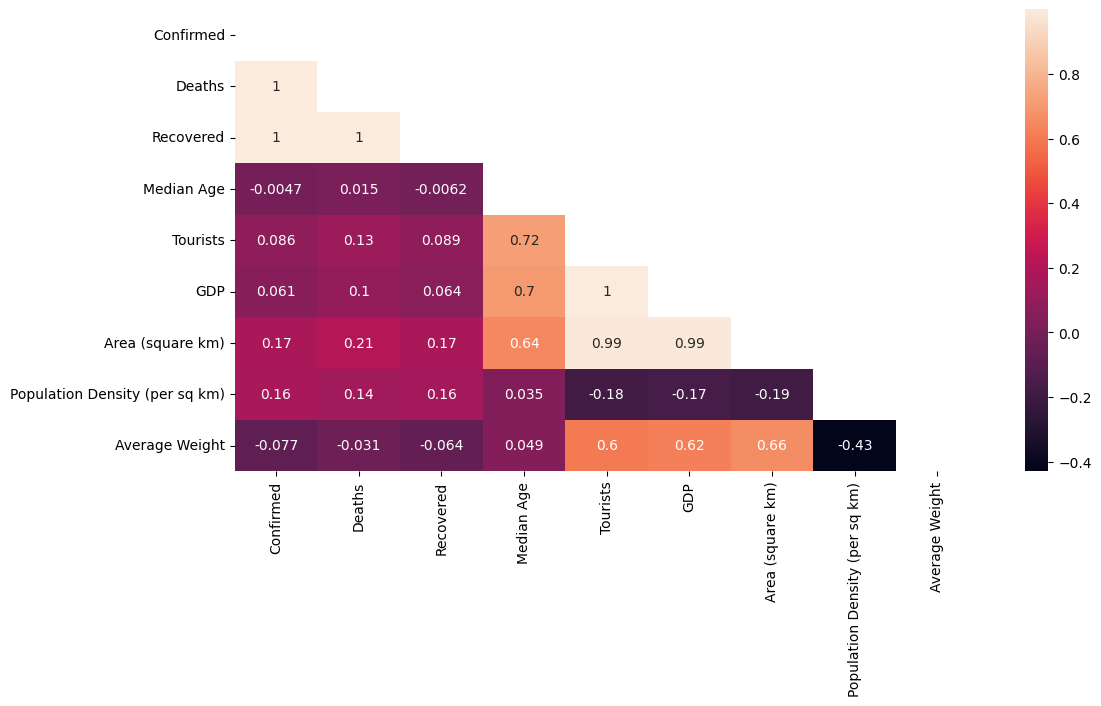

In [229]:
req=comp_data[["Confirmed","Deaths","Recovered","Median Age","Tourists","GDP",
               "Area (square km)","Population Density (per sq km)","Average Weight"]]
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(req.corr(), dtype=np.bool))
sns.heatmap(req.corr(),annot=True, mask=mask)

### Initially:
#### When we see daily news reports on COVID-19 it's really hard to interpret what's actually happening, since the numbers are changing so rapidly but that's something expected from Exponential growth. Since almost all the pandemics tend to grow exponentially it's really hard to understand for someone from a non-mathematical or non-statistical background.

#### We are more concerned about how we are doing and where we are heading in this pandemic rather than just looking at those exponentially growing numbers. The growth won't be exponentially forever, at some point of time the curve will become flat because probably all the people on the planet are infected or we human have been able to control the disease.

#### When we are in the middle of the exponential growth it's almost impossible to tell where are we heading.

#### Here, I am trying to show how we can interpret the exponential growth which is the common trend among all the countries

### Now:
#### The inital correlation analysis doesn't seems to hold true with new updated data.

In [230]:
fig=go.Figure()
for country in n_countries:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country]["log_confirmed"], y=grouped_country.loc[country]["log_active"],
                         mode='lines+markers', name=country))
fig.update_layout(height=600,title="COVID-19 Journey of India's Neighbouring countries",
                 xaxis_title="Confirmed Cases (Logrithmic Scale)",yaxis_title="Active Cases (Logarithmic Scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

China is the only country who has been able to get control over the COVID-19 pandemic, the drop in the graph clearly shows that.

Rest of the countries will follow the trajectory of China if the growth of cases is exponential, as soon as there is a drop in the graph that's clear indication that the particular country has got the control over the exponential growth of the pandemic.

Bangladesh showed that drop initially, that probably because the number of cases were low, the second wave of COVID-19 has struck Bangladesh really bad as they are catching up with China's initial trajetory.

In [231]:
fig=go.Figure()
for country in n_countries:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, y=grouped_country.loc[country]["Confirmed"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(title="7 Days Rolling Average of Daily increase of Confirmed Cases for Neighbouring Countries",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [232]:
fig=go.Figure()
for country in n_countries:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, y=grouped_country.loc[country]["Deaths"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(title="7 Days Rolling Average of Daily increase of Death Cases for Neighbouring Countries",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [233]:
fig = px.pie(comp_data, values='Confirmed', names=comp_data.index, 
             title='Proportion of Confirmed Cases in India and among Neighbouring countries ')
fig.show()

In [234]:
fig = px.pie(comp_data, values='Recovered', names=comp_data.index, 
             title='Proportion of Recovered Cases in India and among Neighbouring countries ')
fig.show()

In [235]:
fig = px.pie(comp_data, values='Deaths', names=comp_data.index, 
             title='Proportion of Death Cases in India and among Neighbouring countries ')
fig.show()

## Comparison of India with other countries badly affected by the Pandemic 

In [236]:
pd.set_option('float_format', '{:f}'.format)
country_names=["Spain","US","Italy","Iran","France","UK","Brazil","Russia","India"]
country_data=pd.concat([spain_datewise.iloc[[-1]],us_datewise.iloc[[-1]],italy_datewise.iloc[[-1]],iran_datewise.iloc[[-1]],
                        france_datewise.iloc[[-1]],uk_datewise.iloc[[-1]],brazil_datewise.iloc[[-1]],russia_datewise.iloc[[-1]],
                        india_datewise.iloc[[-1]]])
country_data=country_data.drop(["Days Since","WeekofYear"],1)
country_data["Mortality"]=(country_data["Deaths"]/country_data["Confirmed"])*100
country_data["Recovery"]=(country_data["Recovered"]/country_data["Confirmed"])*100
country_data.index=country_names
country_data.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery
Spain,554143.00,150376.00,29699.00,5.36,27.14
US,6396551.00,2403511.00,191766.00,3.00,37.58
Italy,283180.00,211885.00,35587.00,12.57,74.82
Iran,395488.00,340842.00,22798.00,5.76,86.18
France,392243.00,89468.00,30819.00,7.86,22.81
UK,360544.00,1845.00,41697.00,11.57,0.51
Brazil,4238446.00,3657701.00,129522.00,3.06,86.30
Russia,1042836.00,859961.00,18207.00,1.75,82.46
India,4562414.00,3542663.00,76271.00,1.67,77.65


In [237]:
max_confirm_india=india_datewise["Confirmed"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Confirmed"]>0)&(spain_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Confirmed"]>0)&(us_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Confirmed"]>0)&(italy_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Confirmed"]>0)&(iran_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Iran to reach number of Confirmed Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Confirmed"]>0)&(france_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in France to reach number of Confirmed Cases equivalent to India")
print("It took",uk_datewise[(uk_datewise["Confirmed"]>0)&(uk_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in United Kingdom to reach number of Confirmed Cases equivalent to India")
print("It took",brazil_datewise[(brazil_datewise["Confirmed"]>0)&(brazil_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Brazil to reach number of Confirmed Cases equivalent to India")
print("It took",russia_datewise[(russia_datewise["Confirmed"]>0)&(russia_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Russia to reach number of Confirmed Cases equivalent to India")
print("It took",india_datewise[india_datewise["Confirmed"]>0].shape[0],"days in India to reach",max_confirm_india,"Confirmed Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india].index, y=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Confirmed"]<=max_confirm_india].index, y=us_datewise[us_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india].index, y=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india].index, y=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Confirmed"]<=max_confirm_india].index, y=france_datewise[france_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india].index, y=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india].index, y=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india].index, y=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines',name="India"))
fig.update_layout(title="Growth of Confirmed Cases with respect to India",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It took 223 days in Spain to reach number of Confirmed Cases equivalent to India
It took 192 days in USA to reach number of Confirmed Cases equivalent to India
It took 224 days in Italy to reach number of Confirmed Cases equivalent to India
It took 205 days in Iran to reach number of Confirmed Cases equivalent to India
It took 231 days in France to reach number of Confirmed Cases equivalent to India
It took 224 days in United Kingdom to reach number of Confirmed Cases equivalent to India
It took 198 days in Brazil to reach number of Confirmed Cases equivalent to India
It took 224 days in Russia to reach number of Confirmed Cases equivalent to India
It took 225 days in India to reach 4562414.0 Confirmed Cases


In [238]:
max_deaths_india=india_datewise["Deaths"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Spain to reach number of Deaths Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in USA to reach number of Deaths Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Italy to reach number of Deaths Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Iran to reach number of Deaths Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in France to reach number of Deaths Cases equivalent to India")
print("It took",uk_datewise[(uk_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in UK to reach number of Deaths Cases equivalent to India")
print("It took",brazil_datewise[(brazil_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Brazil to reach number of Deaths Cases equivalent to India")
print("It took",russia_datewise[(russia_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Russia to reach number of Deaths Cases equivalent to India")
print("It took",india_datewise.shape[0],"days in India to reach",max_deaths_india,"Deaths Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india].index, y=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Deaths"]<=max_deaths_india].index, y=us_datewise[us_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india].index, y=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india].index, y=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Deaths"]<=max_deaths_india].index, y=france_datewise[france_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india].index, y=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india].index, y=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india].index, y=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"],
                    mode='lines',name="India"))
fig.update_layout(title="Growth of Death Cases with respect to India",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It took 223 days in Spain to reach number of Deaths Cases equivalent to India
It took 107 days in USA to reach number of Deaths Cases equivalent to India
It took 224 days in Italy to reach number of Deaths Cases equivalent to India
It took 205 days in Iran to reach number of Deaths Cases equivalent to India
It took 231 days in France to reach number of Deaths Cases equivalent to India
It took 224 days in UK to reach number of Deaths Cases equivalent to India
It took 142 days in Brazil to reach number of Deaths Cases equivalent to India
It took 224 days in Russia to reach number of Deaths Cases equivalent to India
It took 225 days in India to reach 76271.0 Deaths Cases


In [239]:
max_recovered_india=india_datewise["Recovered"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Spain to reach number of Recovered Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in USA to reach number of Recovered Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Italy to reach number of Recovered Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Iran to reach number of Recovered Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in France to reach number of Recovered Cases equivalent to India")
print("It took",uk_datewise[(uk_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in UK to reach number of Recovered Cases equivalent to India")
print("It took",brazil_datewise[(brazil_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Brazil to reach number of Recovered Cases equivalent to India")
print("It took",russia_datewise[(russia_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Russia to reach number of Recovered Cases equivalent to India")
print("It took",india_datewise.shape[0],"days in India to reach",max_recovered_india,"Recovered Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Recovered"]<=max_recovered_india].index, y=spain_datewise[spain_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Recovered"]<=max_recovered_india].index, y=us_datewise[us_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Recovered"]<=max_recovered_india].index, y=italy_datewise[italy_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Recovered"]<=max_recovered_india].index, y=iran_datewise[iran_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Recovered"]<=max_recovered_india].index, y=france_datewise[france_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Recovered"]<=max_recovered_india].index, y=uk_datewise[uk_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Recovered"]<=max_recovered_india].index, y=brazil_datewise[brazil_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Recovered"]<=max_recovered_india].index, y=russia_datewise[russia_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"],
                    mode='lines',name="India"))
fig.update_layout(title="Growth of Recovered Cases with respect to India",
                 xaxis_title="Date",yaxis_title="Number of Recovered Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It took 223 days in Spain to reach number of Recovered Cases equivalent to India
It took 233 days in USA to reach number of Recovered Cases equivalent to India
It took 224 days in Italy to reach number of Recovered Cases equivalent to India
It took 205 days in Iran to reach number of Recovered Cases equivalent to India
It took 231 days in France to reach number of Recovered Cases equivalent to India
It took 224 days in UK to reach number of Recovered Cases equivalent to India
It took 195 days in Brazil to reach number of Recovered Cases equivalent to India
It took 224 days in Russia to reach number of Recovered Cases equivalent to India
It took 225 days in India to reach 3542663.0 Recovered Cases


In [240]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india].index, y=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Confirmed"]<=max_confirm_india].index, y=us_datewise[us_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india].index, y=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india].index, y=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Confirmed"]<=max_confirm_india].index, y=france_datewise[france_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india].index, y=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india].index, y=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india].index, y=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().fillna(0),
                    mode='lines',name="India"))
fig.update_layout(title="Daily Increase in Number of Confirmed Cases",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [241]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india].index, y=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Deaths"]<=max_deaths_india].index, y=us_datewise[us_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india].index, y=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india].index, y=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Deaths"]<=max_deaths_india].index, y=france_datewise[france_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india].index, y=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india].index, y=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india].index, y=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().fillna(0),
                    mode='lines',name="India"))
fig.update_layout(title="Daily Increase in Number of Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [242]:
week_num_spain=[]
spain_weekwise_confirmed=[]
spain_weekwise_recovered=[]
spain_weekwise_deaths=[]
w=1
for i in list(spain_datewise["WeekofYear"].unique()):
    spain_weekwise_confirmed.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    spain_weekwise_recovered.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    spain_weekwise_deaths.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_spain.append(w)
    w=w+1

week_num_us=[]
us_weekwise_confirmed=[]
us_weekwise_recovered=[]
us_weekwise_deaths=[]
w=1
for i in list(us_datewise["WeekofYear"].unique()):
    us_weekwise_confirmed.append(us_datewise[us_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    us_weekwise_recovered.append(us_datewise[us_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    us_weekwise_deaths.append(us_datewise[us_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_us.append(w)
    w=w+1

week_num_italy=[]
italy_weekwise_confirmed=[]
italy_weekwise_recovered=[]
italy_weekwise_deaths=[]
w=1
for i in list(italy_datewise["WeekofYear"].unique()):
    italy_weekwise_confirmed.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    italy_weekwise_recovered.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    italy_weekwise_deaths.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_italy.append(w)
    w=w+1
    
week_num_iran=[]
iran_weekwise_confirmed=[]
iran_weekwise_recovered=[]
iran_weekwise_deaths=[]
w=1
for i in list(iran_datewise["WeekofYear"].unique()):
    iran_weekwise_confirmed.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    iran_weekwise_recovered.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    iran_weekwise_deaths.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_iran.append(w)
    w=w+1
    
week_num_france=[]
france_weekwise_confirmed=[]
france_weekwise_recovered=[]
france_weekwise_deaths=[]
w=1
for i in list(france_datewise["WeekofYear"].unique()):
    france_weekwise_confirmed.append(france_datewise[france_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    france_weekwise_recovered.append(france_datewise[france_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    france_weekwise_deaths.append(france_datewise[france_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_france.append(w)
    w=w+1
    
week_num_uk=[]
uk_weekwise_confirmed=[]
uk_weekwise_recovered=[]
uk_weekwise_deaths=[]
w=1
for i in list(uk_datewise["WeekofYear"].unique()):
    uk_weekwise_confirmed.append(uk_datewise[uk_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    uk_weekwise_recovered.append(uk_datewise[uk_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    uk_weekwise_deaths.append(uk_datewise[uk_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_uk.append(w)
    w=w+1
    
week_num_br=[]
br_weekwise_confirmed=[]
br_weekwise_recovered=[]
br_weekwise_deaths=[]
w=1
for i in list(brazil_datewise["WeekofYear"].unique()):
    br_weekwise_confirmed.append(brazil_datewise[brazil_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    br_weekwise_recovered.append(brazil_datewise[brazil_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    br_weekwise_deaths.append(brazil_datewise[brazil_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_br.append(w)
    w=w+1
    
week_num_rus=[]
rus_weekwise_confirmed=[]
rus_weekwise_recovered=[]
rus_weekwise_deaths=[]
w=1
for i in list(russia_datewise["WeekofYear"].unique()):
    rus_weekwise_confirmed.append(russia_datewise[russia_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    rus_weekwise_recovered.append(russia_datewise[russia_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    rus_weekwise_deaths.append(russia_datewise[russia_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_rus.append(w)
    w=w+1

In [243]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_spain, y=spain_weekwise_confirmed,
                    mode='lines+markers',name="Spain"))
fig.add_trace(go.Scatter(x=week_num_us, y=us_weekwise_confirmed,
                    mode='lines+markers',name="USA"))
fig.add_trace(go.Scatter(x=week_num_italy, y=italy_weekwise_confirmed,
                    mode='lines+markers',name="Italy"))
fig.add_trace(go.Scatter(x=week_num_iran, y=iran_weekwise_confirmed,
                    mode='lines+markers',name="Iran"))
fig.add_trace(go.Scatter(x=week_num_france, y=france_weekwise_confirmed,
                    mode='lines+markers',name="France"))
fig.add_trace(go.Scatter(x=week_num_uk, y=uk_weekwise_confirmed,
                    mode='lines+markers',name="United Kingdom"))
fig.add_trace(go.Scatter(x=week_num_br, y=br_weekwise_confirmed,
                    mode='lines+markers',name="Brazil"))
fig.add_trace(go.Scatter(x=week_num_rus, y=rus_weekwise_confirmed,
                    mode='lines+markers',name="Russia"))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                    mode='lines+markers',name="India"))
fig.update_layout(title="Weekly Growth of Confirmed Cases",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [244]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_spain, y=spain_weekwise_deaths,
                    mode='lines+markers',name="Spain"))
fig.add_trace(go.Scatter(x=week_num_us, y=us_weekwise_deaths,
                    mode='lines+markers',name="USA"))
fig.add_trace(go.Scatter(x=week_num_italy, y=italy_weekwise_deaths,
                    mode='lines+markers',name="Italy"))
fig.add_trace(go.Scatter(x=week_num_iran, y=iran_weekwise_deaths,
                    mode='lines+markers',name="Iran"))
fig.add_trace(go.Scatter(x=week_num_france, y=france_weekwise_deaths,
                    mode='lines+markers',name="France"))
fig.add_trace(go.Scatter(x=week_num_uk, y=uk_weekwise_deaths,
                    mode='lines+markers',name="United Kingdom"))
fig.add_trace(go.Scatter(x=week_num_br, y=br_weekwise_deaths,
                    mode='lines+markers',name="Brazil"))
fig.add_trace(go.Scatter(x=week_num_rus, y=rus_weekwise_deaths,
                    mode='lines+markers',name="Russia"))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                    mode='lines+markers',name="India"))
fig.update_layout(title="Weekly Growth of Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [245]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_spain, y=pd.Series(spain_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="Spain"))
fig.add_trace(go.Scatter(x=week_num_us, y=pd.Series(us_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="USA"))
fig.add_trace(go.Scatter(x=week_num_italy, y=pd.Series(italy_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="Italy"))
fig.add_trace(go.Scatter(x=week_num_iran, y=pd.Series(iran_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="Iran"))
fig.add_trace(go.Scatter(x=week_num_france, y=pd.Series(france_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="France"))
fig.add_trace(go.Scatter(x=week_num_uk, y=pd.Series(uk_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="United Kingdom"))
fig.add_trace(go.Scatter(x=week_num_br, y=pd.Series(br_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="Brazil"))
fig.add_trace(go.Scatter(x=week_num_rus, y=pd.Series(rus_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="Russia"))
fig.add_trace(go.Scatter(x=week_num_india, y=pd.Series(india_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="India"))
fig.update_layout(title="Weekly Growth of Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### Please note the last data point assoicated with every lineplot of country indicates information about the week that has just started.

### Let's perform different feature Analysis for worst affected countries as well


In [246]:
ac_median_age=[45.5,38.3,47.9,32.4,42,40.8,33.5,39.6,28.2]
ac_tourists=[75315000,76407000,52372000,4942000,82700000,35814000,6547000,24571000,14570000]
ac_weight=[70.556,81.928,69.205,67.608,66.782,75.795,66.093,71.418,52.943]
ac_gdp=[1.62,24.08,2.40,0.56,3.19,3.26,2.54,1.95,3.28]
ac_area=[505992,9833517,301339,1648195,640679,242495,8515767,17098246,3287263]
ac_pd=[93,34,200,51,123,280,25.43,8.58,414]
country_data["Median Age"]=ac_median_age
country_data["Tourists"]=ac_tourists
country_data["GDP"]=ac_gdp
country_data["Area (square km)"]=ac_area
country_data["Average Weight"]=ac_weight
country_data["Population Density (per sq km)"]=ac_pd
country_data.sort_values(["Confirmed"],ascending=False)
country_data.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Median Age,Tourists,GDP,Area (square km),Average Weight,Population Density (per sq km)
Spain,554143.00,150376.00,29699.00,5.36,27.14,45.50,75315000.00,1.62,505992.00,70.56,93.00
US,6396551.00,2403511.00,191766.00,3.00,37.58,38.30,76407000.00,24.08,9833517.00,81.93,34.00
Italy,283180.00,211885.00,35587.00,12.57,74.82,47.90,52372000.00,2.40,301339.00,69.20,200.00
Iran,395488.00,340842.00,22798.00,5.76,86.18,32.40,4942000.00,0.56,1648195.00,67.61,51.00
France,392243.00,89468.00,30819.00,7.86,22.81,42.00,82700000.00,3.19,640679.00,66.78,123.00
UK,360544.00,1845.00,41697.00,11.57,0.51,40.80,35814000.00,3.26,242495.00,75.80,280.00
Brazil,4238446.00,3657701.00,129522.00,3.06,86.30,33.50,6547000.00,2.54,8515767.00,66.09,25.43
Russia,1042836.00,859961.00,18207.00,1.75,82.46,39.60,24571000.00,1.95,17098246.00,71.42,8.58
India,4562414.00,3542663.00,76271.00,1.67,77.65,28.20,14570000.00,3.28,3287263.00,52.94,414.00


<Axes: >

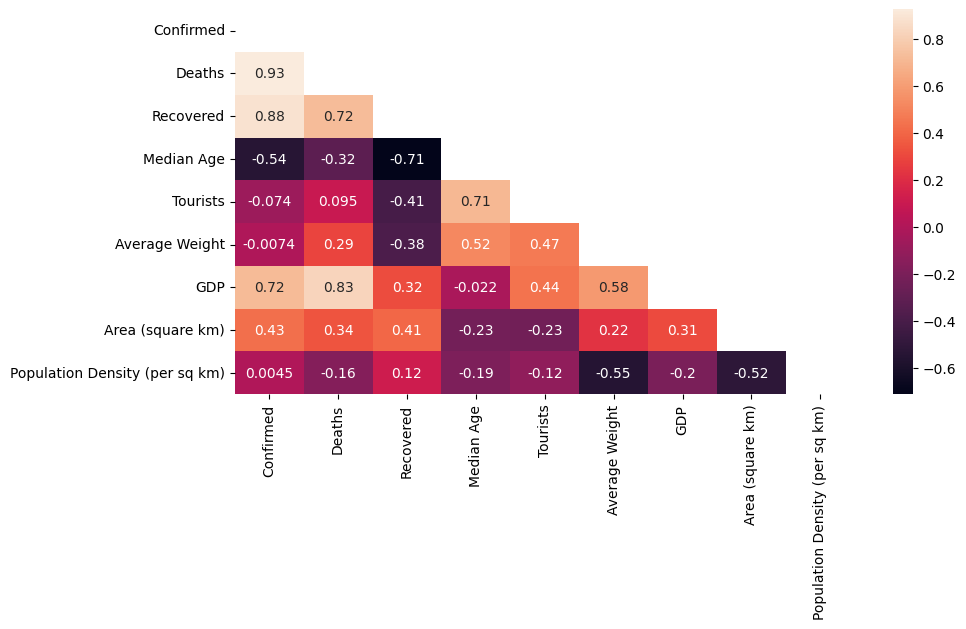

In [247]:
new_req=country_data[["Confirmed","Deaths","Recovered","Median Age","Tourists","Average Weight",
                     "GDP","Area (square km)","Population Density (per sq km)"]]
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(new_req.corr(), dtype=np.bool))
sns.heatmap(new_req.corr(),annot=True, mask=mask)

**Median Age's correlation with number of Confirmed Cases is positive and prominently high in some countries but not in some, so it's not evident that age has anything to do with people who will be tested positive with COVID-19 all are equally vunerable. But Median age has very high correlation with number of Death Cases in all countries, implying Death Rate is high among old age group.**

**Number of Tourists has very high corrleation with both with Number of Confirmed Cases and Death cases and that trend is pretty evident in almost all countries. Implying one probable reason for the spread of COVID-19 is Tourism.**

**Weight plays an important role in all three types of cases, as it decided whether a particular person will be infected by COVID-19 or not, his/her death and will he/she be Recovered**

In [248]:
fig=go.Figure()
for country in country_names:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country]["log_confirmed"], y=grouped_country.loc[country]["log_active"],
                    mode='lines',name=country))
fig.update_layout(height=600,title="COVID-19 Journey of some worst affected countries and India",
                 xaxis_title="Confirmed Cases (Logrithmic Scale)",yaxis_title="Active Cases (Logarithmic Scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Most of the countries will follow the trejactory of US, which is **Uncontrolled Exponential Growth**

Iran has started to get control over COVID-19 which is evident from their tajectory.

Countries like Italy and Spain who were worst affected by the pandemic initally have started showing the a slight dip in the trajectory which is positive sign.

In [249]:
fig=go.Figure()
for country in country_names:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, y=grouped_country.loc[country]["Confirmed"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Confirmed Cases for Worst affected countries and India",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [250]:
fig = px.pie(country_data, values='Confirmed', names=country_data.index, 
             title='Proportion of Confirmed Cases in India and among Worst affected countries')
fig.show()

In [251]:
fig = px.pie(country_data, values='Recovered', names=country_data.index, 
             title='Proportion of Recovered Cases in India and among Worst affected countries')
fig.show()

In [252]:
fig = px.pie(country_data, values='Deaths', names=country_data.index, 
             title='Proportion of Death Cases in India and among Worst affected countries')
fig.show()

#### Feature Importance using K-Best Feature selection method

In [253]:
model_data=comp_data.drop(["Survival Probability","Mean Mortality Rate","Mean Recovery Rate"],1)
model_data=pd.concat([model_data,country_data])

In [254]:
X=model_data.drop(["Confirmed","Recovered","Deaths","Recovery","Mortality"],1)
y1=model_data["Confirmed"]
y2=model_data["Recovered"]
y3=model_data["Deaths"]

In [255]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
k_best_confirmed=SelectKBest(score_func=f_regression,k='all')
k_best_confirmed.fit(X,y1)
k_best_recovered=SelectKBest(score_func=f_regression,k='all')
k_best_recovered.fit(X,y2)
k_best_deaths=SelectKBest(score_func=f_regression,k='all')
k_best_deaths.fit(X,y3)

SelectKBest(k='all', score_func=<function f_regression at 0x7fd25dac4820>)

In [256]:
fig = go.Figure(data=[go.Bar(name='Feature Importance for Confirmed Cases', x=k_best_confirmed.scores_, y=pd.Series(list(X)),orientation='h'),
    go.Bar(name='Feature Importance for Recovered Cases', x=k_best_recovered.scores_, y=pd.Series(list(X)),orientation='h'),
    go.Bar(name='Feature Importance for Death Cases', x=k_best_deaths.scores_, y=pd.Series(list(X)),orientation='h')])
fig.update_layout(barmode='group',width=900,legend=dict(x=0,y=-0.5,traceorder="normal"),
                 title="Feature Importance using Select K-Best")
fig.show()

## Machine Learning Predictions

### Polynomial Regression

In [257]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
model_scores=[]
model_scores1=[]
train_ml.tail()


,Confirmed,Recovered,Deaths,WeekofYear,Days Since
ObservationDate,,,,,
2020-08-25,3224547.000000,2458339.000000,59357.000000,35,208
2020-08-26,3310234.000000,2523771.000000,60472.000000,35,209
2020-08-27,3387500.000000,2583948.000000,61529.000000,35,210
2020-08-28,3463972.000000,2648998.000000,62550.000000,35,211
2020-08-29,3542733.000000,2713933.000000,63498.000000,35,212


In [258]:
poly = PolynomialFeatures(degree = 6) 

In [259]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [260]:
train_poly1=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly1=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y1=train_ml["Deaths"]

In [261]:
linreg=LinearRegression()
linreg.fit(train_poly,y)

LinearRegression()

In [262]:
linreg1=LinearRegression()
linreg1.fit(train_poly1,y1)

LinearRegression()

In [263]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)                          

Root Mean Squared Error for Polynomial Regression:  31465.498635505835


In [264]:
prediction_poly1=linreg.predict(valid_poly1)
rmse_poly1=np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_poly1))
model_scores1.append(rmse_poly1)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly1)    

Root Mean Squared Error for Polynomial Regression:  3999451.4459122047


In [265]:
comp_data=poly.fit_transform(np.array(india_datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

In [266]:
new_date=[]
new_prediction_poly=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_date_poly=poly.fit_transform(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [267]:
model_predictions=pd.DataFrame(zip(new_date,new_prediction_poly),columns=["Date","Polynomial Regression Prediction"])
model_predictions.head()

,Date,Polynomial Regression Prediction
0,2020-09-11,4569102.577721
1,2020-09-12,4647070.502942
2,2020-09-13,4724734.158402
3,2020-09-14,4802017.689698
4,2020-09-15,4878842.535723


In [268]:
new_date1=[]
new_prediction_poly1=[]
for i in range(1,18):
    new_date1.append(india_datewise.index[-1]+timedelta(days=i))
    new_date_poly1=poly.fit_transform(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly1.append(linreg1.predict(new_date_poly1)[0])

In [269]:
model_predictions1=pd.DataFrame(zip(new_date1,new_prediction_poly1),columns=["Date","Polynomial Regression Prediction"])
model_predictions1.head()

,Date,Polynomial Regression Prediction
0,2020-09-11,79123.211878
1,2020-09-12,80382.425847
2,2020-09-13,81654.808445
3,2020-09-14,82940.519631
4,2020-09-15,84239.725221


### Support Vector Machine Regressor

In [270]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]

In [271]:
svm=SVR(C=0.01,degree=7,kernel='poly')

In [272]:
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),train_ml["Confirmed"])

SVR(C=0.01, degree=7, kernel='poly')

In [273]:
svm1=SVR(C=0.01,degree=7,kernel='poly')

In [274]:
svm1.fit(np.array(train_ml["Days Since"]).reshape(-1,1),train_ml["Deaths"])

SVR(C=0.01, degree=7, kernel='poly')

In [275]:
prediction_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
rmse_svm=np.sqrt(mean_squared_error(prediction_svm,valid_ml["Confirmed"]))
model_scores.append(rmse_svm)
print("Root Mean Square Error for SVR Model: ",rmse_svm)

Root Mean Square Error for SVR Model:  775123.9136083499


In [276]:
prediction_svm1=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
rmse_svm1=np.sqrt(mean_squared_error(prediction_svm,valid_ml["Deaths"]))
model_scores1.append(rmse_svm1)
print("Root Mean Square Error for SVR Model: ",rmse_svm1)

Root Mean Square Error for SVR Model:  4772985.053905112


In [277]:
plt.figure(figsize=(11,6))
predictions=svm.predict(np.array(india_datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

In [278]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm.predict(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [279]:
model_predictions["SVM Prediction"]=new_prediction_svm
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction
0,2020-09-11,4569102.577721,5871905.366605
1,2020-09-12,4647070.502942,6055879.303443
2,2020-09-13,4724734.158402,6244802.884312
3,2020-09-14,4802017.689698,6438786.586529
4,2020-09-15,4878842.535723,6637942.851378


In [280]:
new_date1=[]
new_prediction_svm1=[]
for i in range(1,18):
    new_date1.append(india_datewise.index[-1]+timedelta(days=i))
    new_prediction_svm1.append(svm1.predict(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [281]:
model_predictions1["SVM Prediction"]=new_prediction_svm1
model_predictions1.head()

,Date,Polynomial Regression Prediction,SVM Prediction
0,2020-09-11,79123.211878,126659.021134
1,2020-09-12,80382.425847,130626.688448
2,2020-09-13,81654.808445,134701.102082
3,2020-09-14,82940.519631,138884.644642
4,2020-09-15,84239.725221,143179.741089


Support Vectore Machine Model doesn't seem to be performing great, as predictions are either understimated or overestimated.

## Time Series Forecasting Models

#### Holt's Linear Model

In [282]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [283]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.3, smoothing_slope=1.2)

In [284]:
y_pred["Holt"]=holt.forecast(len(valid))
rmse_holt_linear=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
model_scores.append(rmse_holt_linear)
print("Root Mean Square Error Holt's Linear Model: ",rmse_holt_linear)

Root Mean Square Error Holt's Linear Model:  12621.76282063449


In [285]:
holt1=Holt(np.asarray(model_train["Deaths"])).fit(smoothing_level=0.3, smoothing_slope=1.2)

In [286]:
y_pred["Holt"]=holt1.forecast(len(valid))
rmse_holt_linear1=np.sqrt(mean_squared_error(y_pred["Deaths"],y_pred["Holt"]))
model_scores1.append(rmse_holt_linear1)
print("Root Mean Square Error Holt's Linear Model: ",rmse_holt_linear1)

Root Mean Square Error Holt's Linear Model:  620.9878767807834


In [287]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [288]:
holt_new_prediction=[]
for i in range(1,18):
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-09-11,4569102.577721,5871905.366605,4630514.860815
1,2020-09-12,4647070.502942,6055879.303443,4714944.089676
2,2020-09-13,4724734.158402,6244802.884312,4799373.318537
3,2020-09-14,4802017.689698,6438786.586529,4883802.547398
4,2020-09-15,4878842.535723,6637942.851378,4968231.776258


In [289]:
holt_new_prediction1=[]
for i in range(1,18):
    holt_new_prediction1.append(holt1.forecast((len(valid)+i))[-1])

model_predictions1["Holt's Linear Model Prediction"]=holt_new_prediction1
model_predictions1.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-09-11,79123.211878,126659.021134,77966.593366
1,2020-09-12,80382.425847,130626.688448,79077.157842
2,2020-09-13,81654.808445,134701.102082,80187.722318
3,2020-09-14,82940.519631,138884.644642,81298.286795
4,2020-09-15,84239.725221,143179.741089,82408.851271


#### Holt's Winter Model

In [290]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()
model_train1=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
model_train1["Deaths"]=model_train1["Deaths"].replace(0,1)
y_pred1=valid.copy()

In [291]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=15, trend='mul', seasonal='mul').fit(method='ls')
#print(es.mle_retvals)

In [292]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
rmse_holt_winter=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
model_scores.append(rmse_holt_winter)
print("Root Mean Square Error for Holt's Winter Model: ",rmse_holt_winter)

Root Mean Square Error for Holt's Winter Model:  23791.038411492118


In [293]:
es1=ExponentialSmoothing(np.asarray(model_train1['Deaths']),seasonal_periods=15, trend='mul', seasonal='mul').fit(method='ls')

In [294]:
y_pred1["Holt's Winter Model"]=es1.forecast(len(valid))
rmse_holt_winter1=np.sqrt(mean_squared_error(y_pred1["Deaths"],y_pred1["Holt's Winter Model"]))
model_scores1.append(rmse_holt_winter1)
print("Root Mean Square Error for Holt's Winter Model: ",rmse_holt_winter1)

Root Mean Square Error for Holt's Winter Model:  1164.137043468118


In [295]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [296]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-09-11,4569102.577721,5871905.366605,4630514.860815,4692132.292019
1,2020-09-12,4647070.502942,6055879.303443,4714944.089676,4814394.706939
2,2020-09-13,4724734.158402,6244802.884312,4799373.318537,4924489.969432
3,2020-09-14,4802017.689698,6438786.586529,4883802.547398,5043231.298434
4,2020-09-15,4878842.535723,6637942.851378,4968231.776258,5148008.199173


In [297]:
holt_winter_new_prediction1=[]
for i in range(1,18):
    holt_winter_new_prediction1.append(es1.forecast((len(valid)+i))[-1])
model_predictions1["Holt's Winter Model Prediction"]=holt_winter_new_prediction1
model_predictions1.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-09-11,79123.211878,126659.021134,77966.593366,78998.342668
1,2020-09-12,80382.425847,130626.688448,79077.157842,80616.987547
2,2020-09-13,81654.808445,134701.102082,80187.722318,81994.782967
3,2020-09-14,82940.519631,138884.644642,81298.286795,83734.748822
4,2020-09-15,84239.725221,143179.741089,82408.851271,85158.918816


### AR Model (using AUTO ARIMA)

In [298]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()
y_pred1=valid.copy()

In [299]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=3,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4431.002, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4331.793, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4309.233, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4298.329, Time=0.07 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.183 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True)

In [300]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [301]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  19032.825074817512


In [302]:
model_ar1= auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=3,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar1.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2877.126, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2813.659, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2790.829, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2787.837, Time=0.07 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.207 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True)

In [303]:
prediction_ar1=model_ar1.predict(len(valid))
y_pred1["AR Model Prediction"]=prediction_ar1

In [304]:
model_scores1.append(np.sqrt(mean_squared_error(y_pred["Deaths"],y_pred1["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred1["Deaths"],y_pred1["AR Model Prediction"])))

Root Mean Square Error for AR Model:  168.96086669185942


In [305]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [306]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-09-11,4569102.577721,5871905.366605,4630514.860815,4692132.292019,4600757.198124
1,2020-09-12,4647070.502942,6055879.303443,4714944.089676,4814394.706939,4684737.419036
2,2020-09-13,4724734.158402,6244802.884312,4799373.318537,4924489.969432,4769097.520930
3,2020-09-14,4802017.689698,6438786.586529,4883802.547398,5043231.298434,4853832.047663
4,2020-09-15,4878842.535723,6637942.851378,4968231.776258,5148008.199173,4938944.348015


In [307]:
AR_model_new_prediction1=[]
for i in range(1,18):
    AR_model_new_prediction1.append(model_ar1.predict(len(valid)+i)[-1])
model_predictions1["AR Model Prediction"]=AR_model_new_prediction1
model_predictions1.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-09-11,79123.211878,126659.021134,77966.593366,78998.342668,77052.887151
1,2020-09-12,80382.425847,130626.688448,79077.157842,80616.987547,78127.528220
2,2020-09-13,81654.808445,134701.102082,80187.722318,81994.782967,79207.028084
3,2020-09-14,82940.519631,138884.644642,81298.286795,83734.748822,80291.364915
4,2020-09-15,84239.725221,143179.741089,82408.851271,85158.918816,81380.538281


### MA Model (using AUTO ARIMA)

In [308]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()
y_pred1=valid.copy()

In [309]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4431.002, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4291.255, Time=0.26 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=4325.536, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=4374.271, Time=0.12 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=4276.850, Time=0.85 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=4302.787, Time=0.33 sec

Best model:  ARIMA(0,2,4)(0,0,0)[0] intercept
Total fit time: 1.708 seconds


ARIMA(order=(0, 2, 4), scoring_args={}, suppress_warnings=True)

In [310]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [311]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["MA Model Prediction"])))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["MA Model Prediction"])))

Root Mean Square Error for MA Model:  23558.17762152779


In [312]:
model_ma1= auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma1.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2877.126, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2751.504, Time=0.30 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2753.067, Time=0.76 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=2755.053, Time=0.69 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=2756.860, Time=0.89 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=2752.951, Time=0.81 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 3.512 seconds


ARIMA(order=(0, 2, 1), scoring_args={}, suppress_warnings=True)

In [313]:
prediction_ma1=model_ma1.predict(len(valid))
y_pred1["MA Model Prediction"]=prediction_ma1

In [314]:
model_scores1.append(np.sqrt(mean_squared_error(y_pred1["Deaths"],y_pred1["MA Model Prediction"])))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(y_pred1["Deaths"],y_pred1["MA Model Prediction"])))

Root Mean Square Error for MA Model:  179.71973393450628


In [315]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [316]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-09-11,4569102.577721,5871905.366605,4630514.860815,4692132.292019,4600757.198124,4597929.044347
1,2020-09-12,4647070.502942,6055879.303443,4714944.089676,4814394.706939,4684737.419036,4683354.784168
2,2020-09-13,4724734.158402,6244802.884312,4799373.318537,4924489.969432,4769097.520930,4769141.829710
3,2020-09-14,4802017.689698,6438786.586529,4883802.547398,5043231.298434,4853832.047663,4855290.180971
4,2020-09-15,4878842.535723,6637942.851378,4968231.776258,5148008.199173,4938944.348015,4941799.837953


In [317]:
MA_model_new_prediction1=[]
for i in range(1,18):
    MA_model_new_prediction1.append(model_ma1.predict(len(valid)+i)[-1])
model_predictions1["MA Model Prediction"]=MA_model_new_prediction1
model_predictions1.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-09-11,79123.211878,126659.021134,77966.593366,78998.342668,77052.887151,76918.066544
1,2020-09-12,80382.425847,130626.688448,79077.157842,80616.987547,78127.528220,77984.615806
2,2020-09-13,81654.808445,134701.102082,80187.722318,81994.782967,79207.028084,79056.055990
3,2020-09-14,82940.519631,138884.644642,81298.286795,83734.748822,80291.364915,80132.387095
4,2020-09-15,84239.725221,143179.741089,82408.851271,85158.918816,81380.538281,81213.609122


### ARIMA Model (using AUTO ARIMA)

In [318]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()
y_pred1=valid.copy()

In [319]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4431.002, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4291.255, Time=0.25 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=4325.536, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=4374.271, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4331.793, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4280.310, Time=0.27 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4309.233, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=4281.894, Time=0.47 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=4294.614, Time=2.54 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4298.329, Time=0.36 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=4287.623, Time=0.56 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=4291.870, Time=2.68 sec

Best model:  ARIMA(1,2,1

ARIMA(order=(1, 2, 1), scoring_args={}, suppress_warnings=True)

In [320]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [321]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["ARIMA Model Prediction"])))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["ARIMA Model Prediction"])))

Root Mean Square Error for MA Model:  45317.66097161771


In [322]:
model_arima1= auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima1.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2877.126, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2751.504, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2753.067, Time=0.90 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=2755.053, Time=1.22 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2813.659, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2753.074, Time=0.51 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=2749.654, Time=0.88 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=2749.065, Time=1.63 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2790.829, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=2755.063, Time=1.02 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=2748.465, Time=1.60 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=2745.638, Time=2.58 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2787.837, Time=0.37 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=2757.046, Time=1.88 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.85 sec

Best model:  A

ARIMA(order=(2, 2, 3), scoring_args={}, suppress_warnings=True)

In [323]:
prediction_arima1=model_arima1.predict(len(valid))
y_pred1["ARIMA Model Prediction"]=prediction_arima1

In [324]:
model_scores1.append(np.sqrt(mean_squared_error(y_pred1["Deaths"],y_pred1["ARIMA Model Prediction"])))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(y_pred1["Deaths"],y_pred1["ARIMA Model Prediction"])))

Root Mean Square Error for MA Model:  183.38212743692057


In [325]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [326]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-09-11,4569102.577721,5871905.366605,4630514.860815,4692132.292019,4600757.198124,4597929.044347,4549380.649571
1,2020-09-12,4647070.502942,6055879.303443,4714944.089676,4814394.706939,4684737.419036,4683354.784168,4629362.631198
2,2020-09-13,4724734.158402,6244802.884312,4799373.318537,4924489.969432,4769097.520930,4769141.829710,4709699.453852
3,2020-09-14,4802017.689698,6438786.586529,4883802.547398,5043231.298434,4853832.047663,4855290.180971,4790391.117666
4,2020-09-15,4878842.535723,6637942.851378,4968231.776258,5148008.199173,4938944.348015,4941799.837953,4871437.622601


In [327]:
ARIMA_model_new_prediction1=[]
for i in range(1,18):
    ARIMA_model_new_prediction1.append(model_arima1.predict(len(valid)+i)[-1])
model_predictions1["ARIMA Model Prediction"]=ARIMA_model_new_prediction1
model_predictions1.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-09-11,79123.211878,126659.021134,77966.593366,78998.342668,77052.887151,76918.066544,76904.236303
1,2020-09-12,80382.425847,130626.688448,79077.157842,80616.987547,78127.528220,77984.615806,77967.924937
2,2020-09-13,81654.808445,134701.102082,80187.722318,81994.782967,79207.028084,79056.055990,79039.610684
3,2020-09-14,82940.519631,138884.644642,81298.286795,83734.748822,80291.364915,80132.387095,80115.137026
4,2020-09-15,84239.725221,143179.741089,82408.851271,85158.918816,81380.538281,81213.609122,81194.887536


### Facebook's Prophet Model

In [328]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_d=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(india_datewise.index),list(india_datewise["Confirmed"])),columns=['ds','y'])
prophet_deaths=pd.DataFrame(zip(list(india_datewise.index),list(india_datewise["Deaths"])),columns=['ds','y'])

In [329]:
prophet_c.fit(prophet_confirmed)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0h3f32av/ve5klcs_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0h3f32av/4gq7_tby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66421', 'data', 'file=/tmp/tmp0h3f32av/ve5klcs_.json', 'init=/tmp/tmp0h3f32av/4gq7_tby.json', 'output', 'file=/tmp/tmp0h3f32av/prophet_modelbisvta4b/prophet_model-20230502071232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [330]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [331]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [332]:
rmse_prophet=np.sqrt(mean_squared_error(india_datewise["Confirmed"],confirmed_forecast['yhat'].head(india_datewise.shape[0])))
model_scores.append(rmse_prophet)
print("Root Mean Squared Error for Prophet Model: ",rmse_prophet)

Root Mean Squared Error for Prophet Model:  31971.045337348256


In [333]:
prophet_d.fit(prophet_deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0h3f32av/uhosiy__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0h3f32av/vp4v_sz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72840', 'data', 'file=/tmp/tmp0h3f32av/uhosiy__.json', 'init=/tmp/tmp0h3f32av/vp4v_sz1.json', 'output', 'file=/tmp/tmp0h3f32av/prophet_modelwymq51un/prophet_model-20230502071233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [334]:
forecast_d=prophet_d.make_future_dataframe(periods=17)
forecast_deaths=forecast_d.copy()

In [335]:
deaths_forecast=prophet_d.predict(forecast_d)

In [336]:
rmse_prophet1=np.sqrt(mean_squared_error(india_datewise["Deaths"],deaths_forecast['yhat'].head(india_datewise.shape[0])))
model_scores1.append(rmse_prophet1)
print("Root Mean Squared Error for Prophet Model: ",rmse_prophet1)

Root Mean Squared Error for Prophet Model:  276.1253486817446


Figure(1000x600)


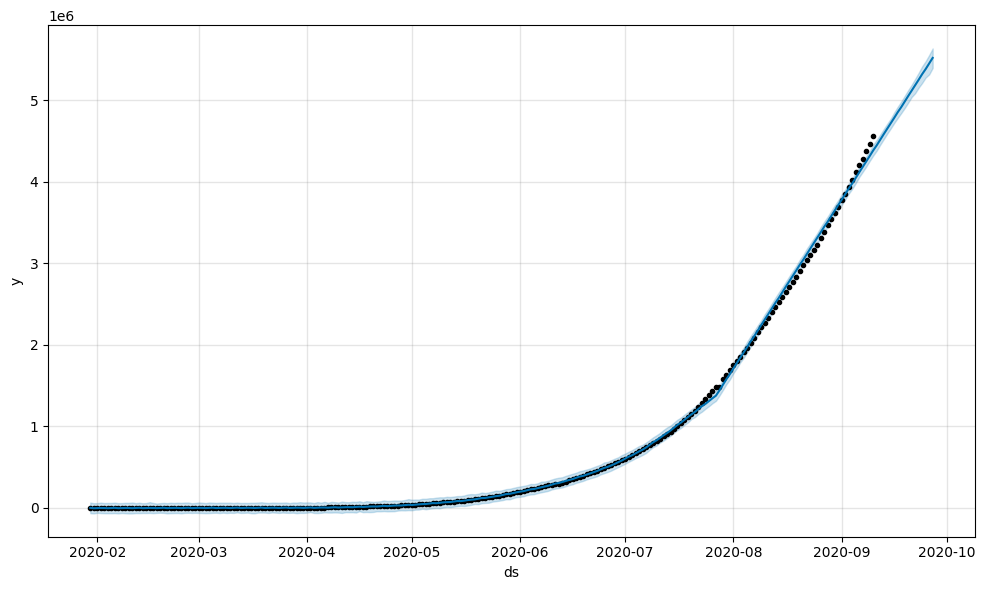

In [337]:
print(prophet_c.plot(confirmed_forecast))

Figure(900x600)


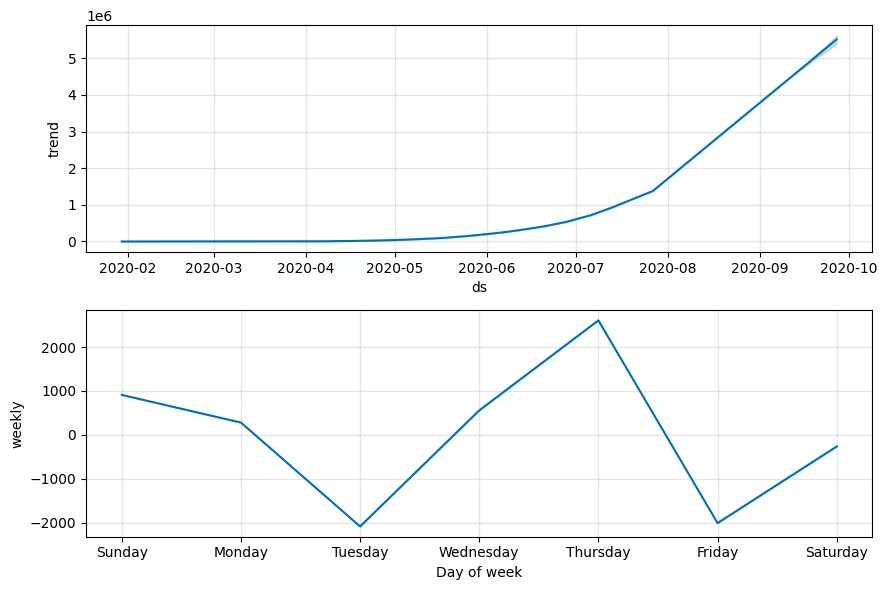

In [338]:
print(prophet_c.plot_components(confirmed_forecast))

In [339]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2020-09-11,4569102.577721,5871905.366605,4630514.860815,4692132.292019,4600757.198124,4597929.044347,4549380.649571,4446076.613376,4512304.595842
1,2020-09-12,4647070.502942,6055879.303443,4714944.089676,4814394.706939,4684737.419036,4683354.784168,4629362.631198,4514593.697924,4577008.127981
2,2020-09-13,4724734.158402,6244802.884312,4799373.318537,4924489.969432,4769097.520930,4769141.829710,4709699.453852,4582542.600065,4644186.654381
3,2020-09-14,4802017.689698,6438786.586529,4883802.547398,5043231.298434,4853832.047663,4855290.180971,4790391.117666,4648687.402643,4708955.144415
4,2020-09-15,4878842.535723,6637942.851378,4968231.776258,5148008.199173,4938944.348015,4941799.837953,4871437.622601,4713098.070195,4772606.036597


In [340]:
model_predictions1["Prophet's Prediction"]=list(deaths_forecast["yhat"].tail(17))
model_predictions1["Prophet's Upper Bound"]=list(deaths_forecast["yhat_upper"].tail(17))
model_predictions1.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2020-09-11,79123.211878,126659.021134,77966.593366,78998.342668,77052.887151,76918.066544,76904.236303,75915.304689,76435.447567
1,2020-09-12,80382.425847,130626.688448,79077.157842,80616.987547,78127.528220,77984.615806,77967.924937,76859.001456,77383.955808
2,2020-09-13,81654.808445,134701.102082,80187.722318,81994.782967,79207.028084,79056.055990,79039.610684,77796.391237,78352.478674
3,2020-09-14,82940.519631,138884.644642,81298.286795,83734.748822,80291.364915,80132.387095,80115.137026,78726.371527,79265.864391
4,2020-09-15,84239.725221,143179.741089,82408.851271,85158.918816,81380.538281,81213.609122,81194.887536,79692.781906,80296.624199


## Summarizing Results of all Models

In [341]:
models=["Polynomial Regression","Support Vector Machine Regresssor","Holt's Linear Model",
       "Holt's Winter Model","Auto Regressive Model (AR)", "Moving Average Model (MA)","ARIMA Model","Facebook's Prophet Model"]

In [342]:
model_evaluation=pd.DataFrame(list(zip(models,model_scores)),columns=["Model Name","Root Mean Squared Error"])
model_evaluation=model_evaluation.sort_values(["Root Mean Squared Error"])
model_evaluation.style.background_gradient(cmap='Reds')

,Model Name,Root Mean Squared Error
2,Holt's Linear Model,12621.762821
4,Auto Regressive Model (AR),19032.825075
5,Moving Average Model (MA),23558.177622
3,Holt's Winter Model,23791.038411
0,Polynomial Regression,31465.498636
7,Facebook's Prophet Model,31971.045337
6,ARIMA Model,45317.660972
1,Support Vector Machine Regresssor,775123.913608


In [343]:
model_evaluation=pd.DataFrame(list(zip(models,model_scores1)),columns=["Model Name","Root Mean Squared Error"])
model_evaluation=model_evaluation.sort_values(["Root Mean Squared Error"])
model_evaluation.style.background_gradient(cmap='Reds')

,Model Name,Root Mean Squared Error
4,Auto Regressive Model (AR),168.960867
5,Moving Average Model (MA),179.719734
6,ARIMA Model,183.382127
7,Facebook's Prophet Model,276.125349
2,Holt's Linear Model,620.987877
3,Holt's Winter Model,1164.137043
0,Polynomial Regression,3999451.445912
1,Support Vector Machine Regresssor,4772985.053905


In [344]:
model_predictions["Average of Predictions Models"]=model_predictions.mean(axis=1)
show_predictions=model_predictions.tail()
show_predictions

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Average of Predictions Models
12,2020-09-23,5466568.529953,8431567.147371,5643665.607144,6125042.526763,5633411.375998,5646884.099738,5532583.942796,5249934.202478,5334900.807893,5896062.026682
13,2020-09-24,5535258.542612,8682673.475098,5728094.836005,6242845.189595,5721915.900139,5736645.508202,5616824.017907,5318756.731277,5414187.233231,5999689.048230
14,2020-09-25,5602544.306486,8940190.646144,5812524.064866,6392360.205546,5810797.356414,5826768.222387,5701418.934148,5380918.346652,5477616.942487,6105015.447237
15,2020-09-26,5668314.133050,9204254.477027,5896953.293726,6519024.515140,5900055.728481,5917252.242291,5786368.691520,5449435.431200,5553005.713016,6210518.247273
16,2020-09-27,5732453.006929,9475003.076444,5981382.522587,6688890.075303,5989691.030935,6008097.567917,5871673.290022,5517384.333341,5633617.546103,6322021.383287


In [345]:
model_predictions1["Average of Predictions Models"]=model_predictions1.mean(axis=1)
show_predictions1=model_predictions1.tail()
show_predictions1

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Average of Predictions Models
12,2020-09-23,95141.121799,181861.875171,91293.367082,97333.672497,90268.210229,90039.458514,90014.391492,87279.472791,88453.525592,101298.343907
13,2020-09-24,96570.282089,187277.350787,92403.931559,98969.214602,91400.952587,91164.698835,91138.447706,88243.485245,89630.373841,102977.637472
14,2020-09-25,98014.951492,192831.085625,93514.496035,100577.690006,92538.535685,92294.830078,92267.951972,89142.553441,90557.565238,104637.739953
15,2020-09-26,99475.370684,198526.008767,94625.060511,102003.401093,93680.959537,93429.852242,93401.641314,90086.250208,91727.943389,106328.498638
16,2020-09-27,100951.788138,204365.098731,95735.624988,104093.410545,94828.224149,94569.765328,94540.886158,91023.639988,92640.894089,108083.259124


In [346]:
fig = make_subplots(rows=1, cols=1,
                   subplot_titles=( "Confirmed Cases"))
fig.add_trace(
    go.Scatter(x=model_predictions.index, y=model_predictions["Average of Predictions Models"],
              name="Confirmed Cases"),
    row=1, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Confirmed Cases", row=1, col=1)
fig.show()

In [347]:
fig = make_subplots(rows=1, cols=1,
                   subplot_titles=( "Death Cases"))
fig.add_trace(
    go.Scatter(x=model_predictions1.index, y=model_predictions1["Average of Predictions Models"],
              name="Death Cases"),
    row=1, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Death Cases", row=1, col=1)
fig.show()

Predicted Mortality rate

In [348]:
x=((model_predictions1['Average of Predictions Models']/model_predictions['Average of Predictions Models'])*100).mean()
print(x)

1.7301901359628429


In [349]:
print('Mean Mortality Rate: ',((model_predictions1['Average of Predictions Models']/model_predictions['Average of Predictions Models'])*100).mean())
print('Median Mortality Rate: ',((model_predictions1['Average of Predictions Models']/model_predictions['Average of Predictions Models'])*100).median())

fig = make_subplots(rows=1, cols=1,
                   subplot_titles=( "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=model_predictions1.index, y=(model_predictions1["Average of Predictions Models"]/model_predictions["Average of Predictions Models"])*100,
              name="Mortality Rate"),
    row=1, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=1)
fig.show()

Mean Mortality Rate:  1.7301901359628429
Median Mortality Rate:  1.7284903178730757
